In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [25]:
C1 = 2
C2 = 4
S1 = 0.2
S2 = 0.9
N = 100
Cor = 0.4

xc1 = np.random.normal(loc=C1, scale=S1, size=(N,2))
xc2 = np.random.normal(loc=C2, scale=S2, size=(N,2))

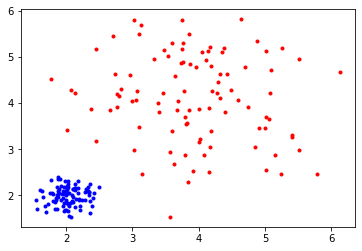

<Figure size 1080x1080 with 0 Axes>

In [26]:
%matplotlib inline
plt.plot(xc1[:,0], xc1[:,1], '.', color='b')
plt.plot(xc2[:,0], xc2[:,1], '.', color='r')
mean1 = np.mean(xc1, axis = 0)
mean2 = np.mean(xc2, axis = 0)
sd1 = np.std(xc1, axis = 0)
sd2 = np.std(xc2, axis = 0)

fig = plt.figure(figsize=(15,15))
plt.show()


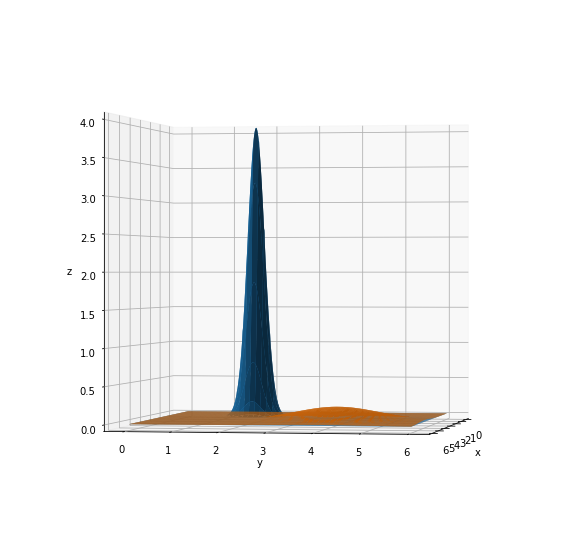

In [31]:
def den(x1, x2, cor, s, c):
    aid = (((x1-c[0])**2/s[0]**2) + ((x2-c[1])**2/s[1]**2)- (2*cor*(x1-c[0])*(x2-c[1])/(s[0]*s[1])))
    e = np.exp(-1/(2*(1-cor**2))*aid)
    ans = 1/(2*np.pi*s[0]*s[1]*np.sqrt(1-cor**2)) * e
    return ans


x1 = np.linspace(0, 6, 1000)
x2 = np.linspace(0, 6, 1000)

X1, X2 = np.meshgrid(x1, x2)

D1 = den(X1, X2, 0, sd1, mean1)
D2 = den(X1, X2, Cor, sd2, mean2)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, D1)
ax.plot_surface(X1, X2, D2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 10)

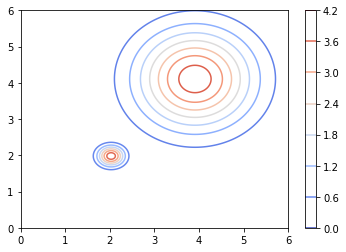

In [32]:
DP1 = plt.contour(X1, X2, D1, cmap = 'coolwarm')
DP2 = plt.contour(X1, X2, D2, cmap = 'coolwarm')

plt.colorbar(DP1)